In [43]:
import pandas as pd

# Names of your JSON files
file_name1 = 'StreamingHistory0.json'
file_name2 = 'StreamingHistory1.json'

# Load the data into Pandas DataFrames
df1 = pd.read_json(file_name1)
df2 = pd.read_json(file_name2)

# Combine the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Now we have our database 
combined_df 

,endTime,artistName,trackName,msPlayed
0,2023-01-03 17:46,Ritviz,Udd Gaye,42828
1,2023-01-04 15:10,Ritviz,Udd Gaye,137584
2,2023-01-04 15:14,King,Tu Aake Dekhle,270000
3,2023-01-04 15:15,Pasi harshit,Har dua me shaamil,20315
4,2023-01-04 15:15,Vishal Mishra,Kaise Hua,7720
...,...,...,...,...
12852,2024-01-04 21:54,Hasan Raheem,Wishes,218663
12853,2024-01-04 21:57,Anuv Jain,Mishri,200437
12854,2024-01-04 21:57,Atif Aslam,Hum Kis Galli Jaa Rahe Hai,4567
12855,2024-01-04 22:16,Metro Boomin,Am I Dreaming,24181


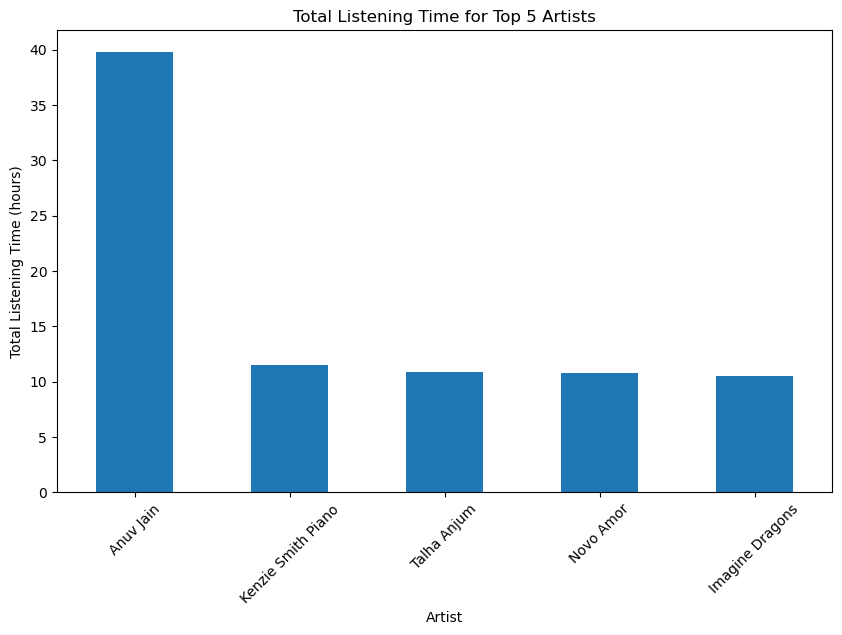

In [44]:

artist_total_time = combined_df.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False)

# Select the top 5 artists
top_5_artists = artist_total_time.head(5)

# Convert milliseconds to hours for better readability
top_5_artists_hours = top_5_artists / (1000 * 60 * 60)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_5_artists_hours.plot(kind='bar')

plt.title('Total Listening Time for Top 5 Artists')
plt.ylabel('Total Listening Time (hours)')
plt.xlabel('Artist')
plt.xticks(rotation=45)  # Rotate the artist names for readability
plt.show()


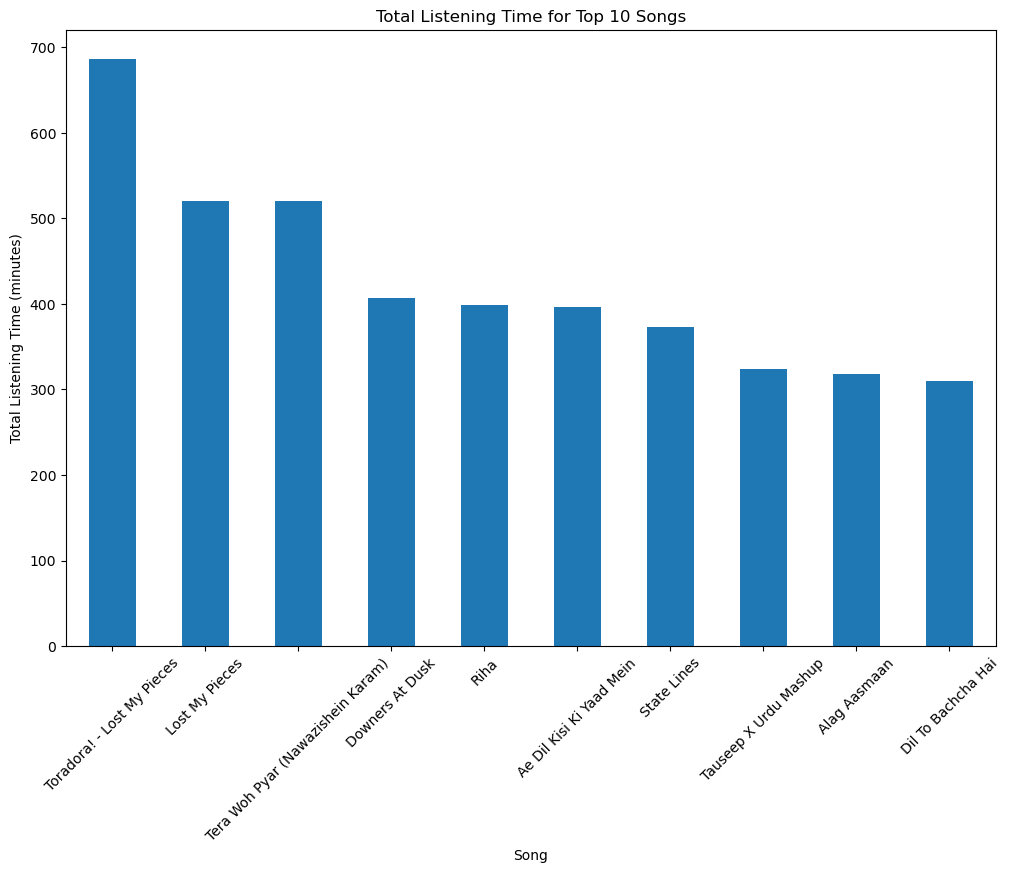

In [45]:
# Assuming 'combined_df' is your DataFrame
song_total_time = combined_df.groupby('trackName')['msPlayed'].sum().sort_values(ascending=False)

# Select the top 10 songs
top_10_songs = song_total_time.head(10)

# Convert milliseconds to minutes for better readability
top_10_songs_minutes = top_10_songs / (1000 * 60)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_10_songs_minutes.plot(kind='bar')

plt.title('Total Listening Time for Top 10 Songs')
plt.ylabel('Total Listening Time (minutes)')
plt.xlabel('Song')
plt.xticks(rotation=45)  # Rotate the song names for readability
plt.show()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


combined_df['endTime'] = pd.to_datetime(combined_df['endTime'])
combined_df['day_of_week'] = combined_df['endTime'].dt.dayofweek

# Define weekdays (0-4) and weekends (5-6)
combined_df['weekend'] = combined_df['day_of_week'] > 4

# Calculate total msPlayed for weekdays and weekends
total_ms_played_weekday = combined_df[combined_df['weekend'] == False]['msPlayed'].sum()
total_ms_played_weekend = combined_df[combined_df['weekend'] == True]['msPlayed'].sum()

# Convert total ms to seconds
total_seconds_played_weekday = total_ms_played_weekday / 1000
total_seconds_played_weekend = total_ms_played_weekend / 1000

print(f"Total Listening Time on Weekdays: {total_seconds_played_weekday} seconds")
print(f"Total Listening Time on Weekends: {total_seconds_played_weekend} seconds")


Total Listening Time on Weekdays: 1312076.619 seconds
Total Listening Time on Weekends: 411569.509 seconds


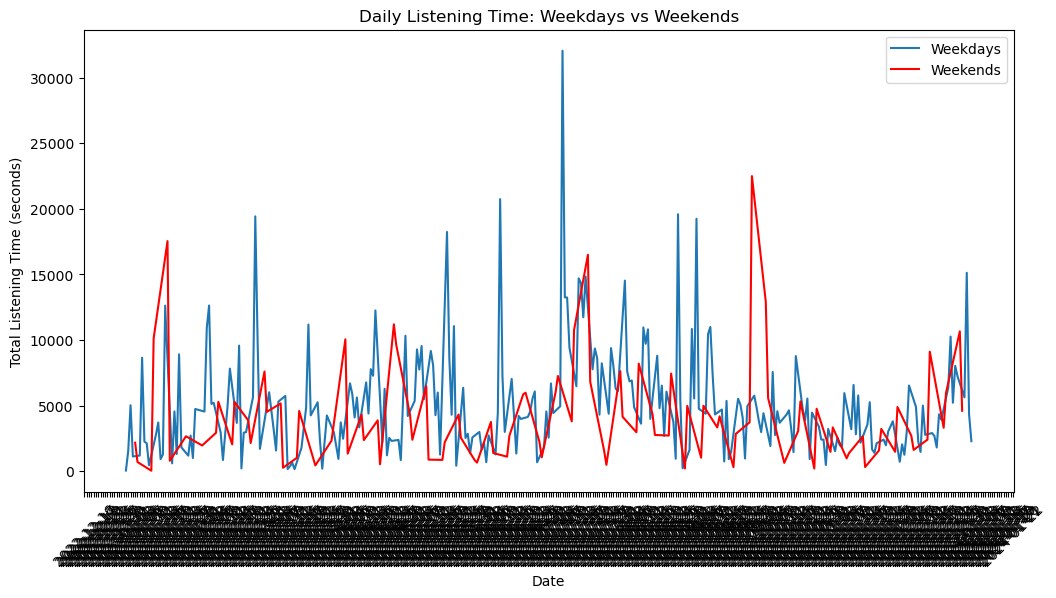

In [47]:
# Group by date and sum the listening time
daily_totals = combined_df.groupby(combined_df['endTime'].dt.date)['msPlayed'].sum().reset_index()

# Convert the endTime to a datetime and extract the day of the week
daily_totals['endTime'] = pd.to_datetime(daily_totals['endTime'])
daily_totals['weekend'] = daily_totals['endTime'].dt.dayofweek >= 5  # Weekends are 5 (Saturday) and 6 (Sunday)

# Convert ms to seconds
daily_totals['msPlayed'] = daily_totals['msPlayed'] / 1000

import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Plotting
weekdays = daily_totals[daily_totals['weekend'] == False]
weekends = daily_totals[daily_totals['weekend'] == True]
plt.plot(weekdays['endTime'], weekdays['msPlayed'], label='Weekdays')
plt.plot(weekends['endTime'], weekends['msPlayed'], label='Weekends', color='red')

# Formatting
plt.xlabel('Date')
plt.ylabel('Total Listening Time (seconds)')
plt.title('Daily Listening Time: Weekdays vs Weekends')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45)
plt.legend()

plt.show()


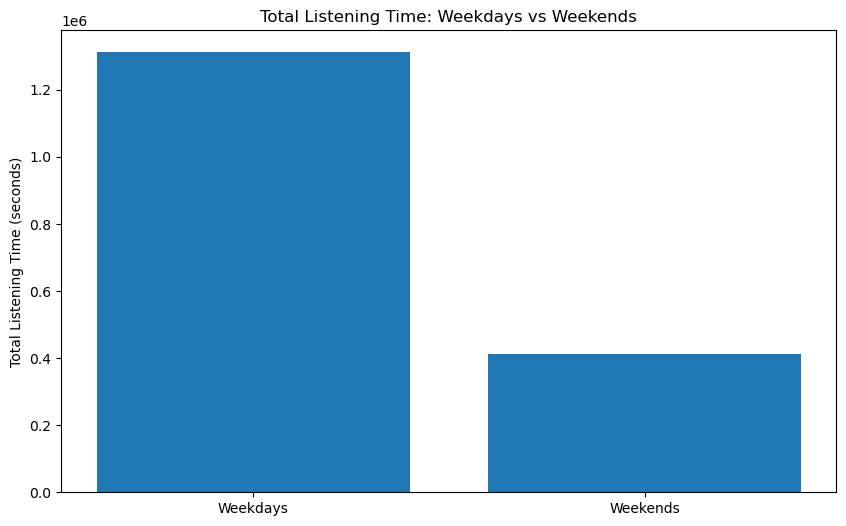

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(['Weekdays', 'Weekends'], [total_seconds_played_weekday, total_seconds_played_weekend])

plt.ylabel('Total Listening Time (seconds)')
plt.title('Total Listening Time: Weekdays vs Weekends')
plt.show()



In [49]:
# Calculate the number of unique weekdays and weekends in the dataset
num_weekdays = len(combined_df[combined_df['weekend'] == False]['endTime'].dt.date.unique())
num_weekends = len(combined_df[combined_df['weekend'] == True]['endTime'].dt.date.unique())

# Calculate average daily msPlayed for weekdays and weekends
avg_ms_played_weekday = total_ms_played_weekday / num_weekdays
avg_ms_played_weekend = total_ms_played_weekend / num_weekends


# Convert ms to seconds
avg_seconds_played_weekday = avg_ms_played_weekday / 1000
avg_seconds_played_weekend = avg_ms_played_weekend / 1000

print(f"Average Daily Listening Time on Weekdays: {avg_seconds_played_weekday} seconds")
print(f"Average Daily Listening Time on Weekends: {avg_seconds_played_weekend} seconds")

Average Daily Listening Time on Weekdays: 5125.29929296875 seconds
Average Daily Listening Time on Weekends: 4157.267767676768 seconds


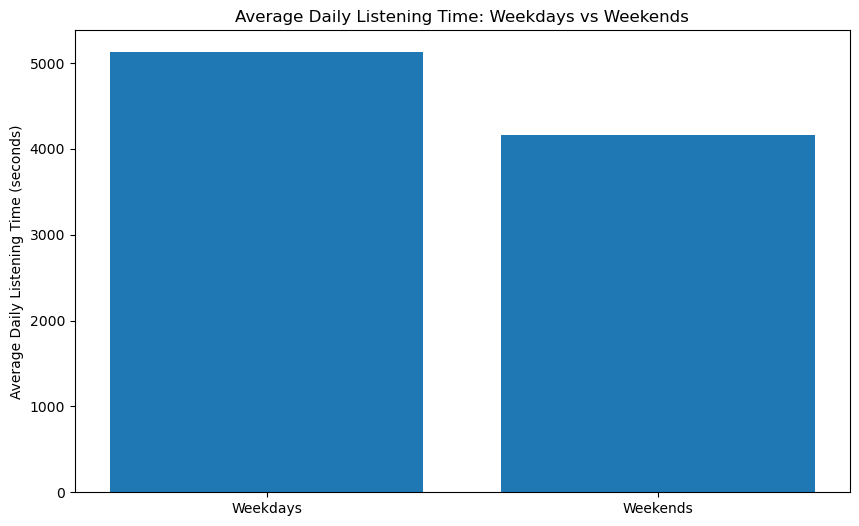

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(['Weekdays', 'Weekends'], [avg_seconds_played_weekday, avg_seconds_played_weekend])

plt.ylabel('Average Daily Listening Time (seconds)')
plt.title('Average Daily Listening Time: Weekdays vs Weekends')
plt.show()

In [51]:
from scipy.stats import mannwhitneyu


# We need to create arrays representing the average for each day
weekday_data = combined_df[combined_df['weekend'] == False].groupby(combined_df['endTime'].dt.date)['msPlayed'].sum() / num_weekdays
weekend_data = combined_df[combined_df['weekend'] == True].groupby(combined_df['endTime'].dt.date)['msPlayed'].sum() / num_weekends

u_statistic, p_value = mannwhitneyu(weekday_data, weekend_data)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - Significant difference in average daily listening time between weekdays and weekends")
else:
    print("Fail to reject the null hypothesis - No significant difference")


Reject the null hypothesis - Significant difference in average daily listening time between weekdays and weekends
